In [2]:
import pandas as pd


df = pd.read_csv("data/2021-01-01_2025-07-25_hrrr_env_final_v8.csv")
print(f"Num rows: {len(df)}")
df.head()

Num rows: 1063947


,gauge_idx,start_datetime_utc,end_datetime_utc,gauge_acc_in,mrms_q3evap_qpe,lat,lon,700mb_UGRD,850mb_DPT,850mb_TMP,...,0-3km_RH,0-5km_RH,low_level_lapse_rate,3hr_lapse_rate_change,sfc_850_pw,sfc_700_pw,850_700_mean_wind,LCL_height,DCAPE,convective_warm_cloud_depth
0,4724.0,2021-01-23 23:12:00+00:00,2021-01-24 00:12:00+00:00,0.0,0.015748,35.939417,-115.077750,2.884766,266.00,277.25,...,20.972270,18.947291,9.120521,0.0,1.355027,5.083167,3.354543,3275.219125,217.040084,0.0
1,4709.0,2021-01-23 23:12:00+00:00,2021-01-24 00:12:00+00:00,0.0,0.007874,35.925000,-115.117000,2.822266,265.75,277.25,...,18.129263,17.823468,9.114583,0.0,1.659570,5.281450,3.429616,3280.064761,249.988458,0.0
2,4564.0,2021-01-23 23:12:00+00:00,2021-01-24 00:12:00+00:00,0.0,0.000000,36.028250,-115.003639,3.759766,268.25,276.75,...,35.305114,21.909930,8.794788,0.0,2.739051,6.916189,3.836471,2990.476711,259.677833,0.0
3,4779.0,2021-01-23 23:12:00+00:00,2021-01-24 00:12:00+00:00,0.0,0.000000,36.021861,-114.958750,3.884766,268.50,276.75,...,30.685404,18.030886,8.794788,0.0,2.890112,7.008753,3.871680,3020.788279,288.870042,0.0
4,4724.0,2021-01-23 23:14:00+00:00,2021-01-24 00:14:00+00:00,0.0,0.015748,35.939417,-115.077750,2.884766,266.00,277.25,...,20.972270,18.947291,9.120521,0.0,1.355027,5.083167,3.354543,3275.219125,217.040084,0.0


In [3]:
at_least_one_pos_precip_mask = (df['gauge_acc_in'] >= 0.04) | (df['mrms_q3evap_qpe'] >= 0.04)
df_non_zero = df[at_least_one_pos_precip_mask]

print(f"# Data points  : {len(df)}")
print(f"# Unique gauges: {len(set(df['gauge_idx']))}")
print("---------------------------------------------------------")
print(f"# Data points   w/ 1+ value >= 0.04: {len(df_non_zero)}")
print(f"# Unique gauges w/ 1+ value >= 0.04: {len(set(df_non_zero['gauge_idx']))}")

# Data points  : 1063947
# Unique gauges: 220
---------------------------------------------------------
# Data points   w/ 1+ value >= 0.04: 385998
# Unique gauges w/ 1+ value >= 0.04: 220


In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt


mrms_bias = np.array(df_non_zero["mrms_q3evap_qpe"] - df_non_zero["gauge_acc_in"])
random.seed(42)
random.shuffle(mrms_bias)

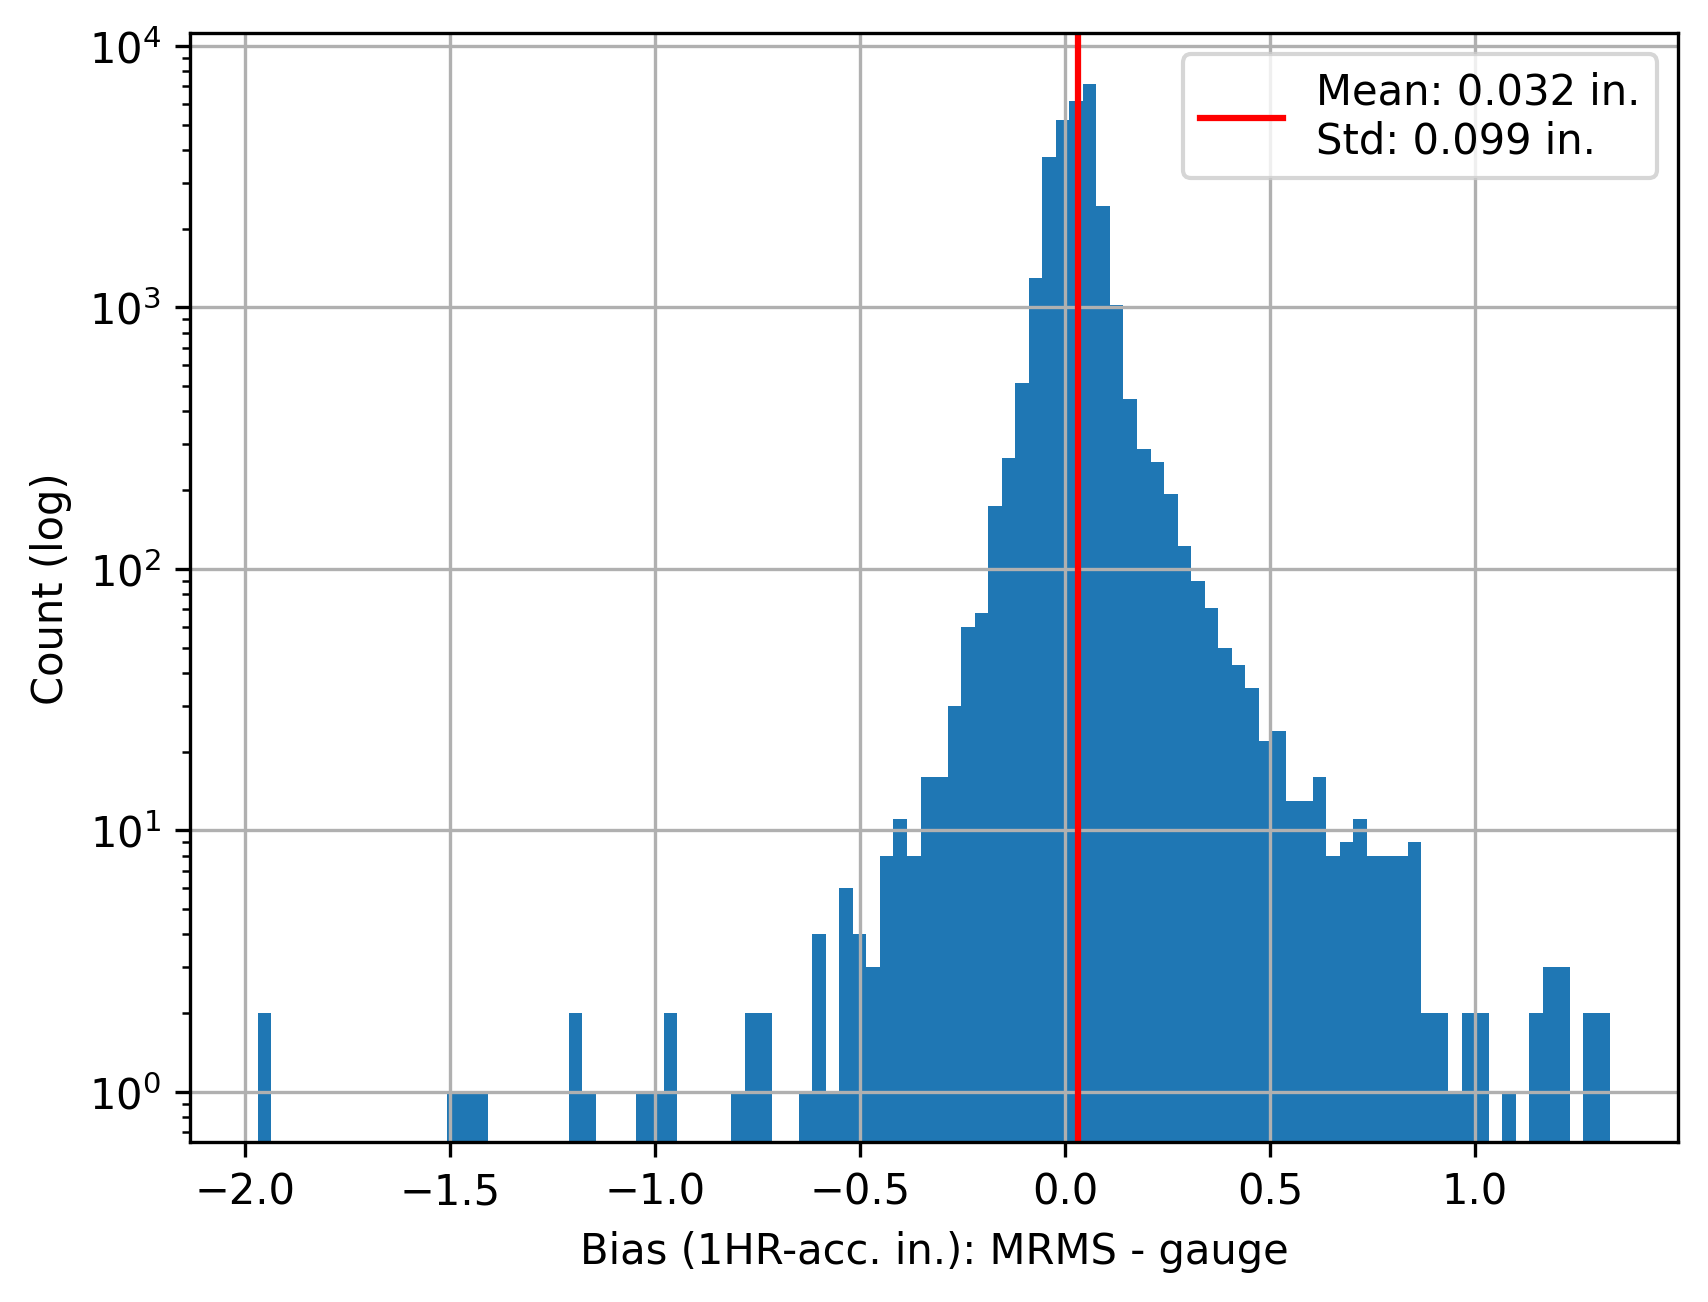

In [17]:

import matplotlib.pyplot as plt
import numpy as np

# Assuming mrms_bias is already defined in your environment
# Example data for demonstration:
# mrms_bias = np.random.randn(50000)

fig, ax = plt.subplots(dpi=300)
arr = mrms_bias[:30000]

ax.hist(mrms_bias[:30000], bins=100, log=True)
ax.axvline(np.mean(arr), color='red', linestyle='-', label=f'Mean: {arr.mean():.3f} in.\nStd: {arr.std():.3f} in.')
ax.set_xlabel("Bias (1HR-acc. in.): MRMS - gauge")
ax.set_ylabel("Count (log)")
ax.grid()
ax.legend()
plt.show()

# Bias Regimes
***
- $\beta = R_{\text{mrms}} - R$

- Extreme underestimation (--)
    - $ \beta \le -0.5$
- Underestimation (-)
    - $ -0.5 \lt \beta \le -0.1 $
- No bias (*)
    - $ -0.1 \lt \beta  \le 0.1 $
- Overestimation (+)
    - $ 0.1 \lt \beta \le 0.5  $
- Extreme overestimation (++)
    - $ 0.5 \lt \beta $


In [6]:
bias = df_non_zero['mrms_q3evap_qpe'] - df_non_zero['gauge_acc_in']

df_non_zero['mrms_bias_category'] = pd.cut(
    bias,
    bins=[-np.inf, -0.5, -0.10, 0.10, 0.5, np.inf],
    labels=[
        "extreme_underestimation",
        "underestimation",
        "no_bias",
        "overestimation",
        "extreme_overestimation"
    ]
)

/tmp/ipykernel_3897526/1099256209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['mrms_bias_category'] = pd.cut(


In [7]:
df_non_zero.groupby("mrms_bias_category").count()

/tmp/ipykernel_3897526/1398131809.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_non_zero.groupby("mrms_bias_category").count()


,gauge_idx,start_datetime_utc,end_datetime_utc,gauge_acc_in,mrms_q3evap_qpe,lat,lon,700mb_UGRD,850mb_DPT,850mb_TMP,...,0-3km_RH,0-5km_RH,low_level_lapse_rate,3hr_lapse_rate_change,sfc_850_pw,sfc_700_pw,850_700_mean_wind,LCL_height,DCAPE,convective_warm_cloud_depth
mrms_bias_category,,,,,,,,,,,,,,,,,,,,,
extreme_underestimation,519,519,519,519,519,519,519,519,519,519,...,519,519,519,519,519,519,519,519,519,519
underestimation,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,...,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482
no_bias,331735,331735,331735,331735,331735,331735,331735,331735,331735,331735,...,331735,331735,331735,331735,331735,331735,331735,331735,331735,331735
overestimation,39169,39169,39169,39169,39169,39169,39169,39169,39169,39169,...,39169,39169,39169,39169,39169,39169,39169,39169,39169,39169
extreme_overestimation,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,...,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093


In [8]:
import numpy as np

columns  = list(df.columns)
features = columns[7: -1]
ccs = []

for feat in features:
    X = df[feat]
    y = df['mrms_q3evap_qpe'] - df['gauge_acc_in']
    # y = df["gauge_acc_in"] # df['mrms_q3evap_qpe'] - df['gauge_acc_in']
    print(f"{feat}: {np.corrcoef(X, y)[0, 1]:.3f}")
    ccs.append((feat, np.corrcoef(X, y)[0, 1]))

700mb_UGRD: -0.051
850mb_DPT: 0.103
850mb_TMP: 0.146
850mb_HGT: 0.018
2m_above_ground_TMP: 0.153
925mb_DPT: 0.090
entire_atmosphere_single_layer_PWAT: 0.002
500mb_TMP: 0.119
700mb_DPT: 0.126
700mb_TMP: 0.134
500mb_DPT: 0.100
700mb_HGT: -0.002
850mb_UGRD: -0.039
700mb_VGRD: -0.028
highest_tropospheric_freezing_level_HGT: 0.092
surface_PRES: -0.012
level_of_adiabatic_condensation_from_sfc_HGT: 0.065
850mb_VGRD: -0.015
2m_above_ground_DPT: 0.075
surface_theta_e: 0.155
lowest_100mb_mean_mixing_ratio: 0.077
925mb_700mb_DPT: 0.112
850mb_700mb_DPT: 0.117
850mb_500mb_DPT: 0.119
LCL_LFC_RH: 0.051
0-3km_RH: -0.018
0-5km_RH: 0.040
low_level_lapse_rate: 0.087
3hr_lapse_rate_change: 0.002
sfc_850_pw: 0.051
sfc_700_pw: 0.087
850_700_mean_wind: -0.044
LCL_height: 0.138
DCAPE: 0.152


In [9]:
ccs = sorted(ccs, key=lambda x:x[1])

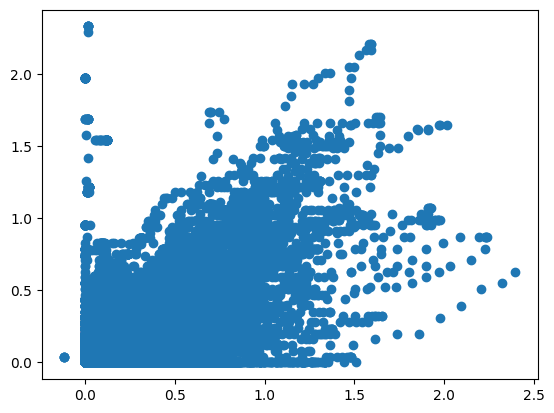

In [10]:
x = df["mrms_q3evap_qpe"]
y = df["gauge_acc_in"]
plt.scatter(x, y);

In [ ]:
ccs[::-1]

In [12]:
for i in range(10):
    cat, val = ccs[i]
    print(f"{cat}: {val:.3f}")

700mb_UGRD: -0.051
850_700_mean_wind: -0.044
850mb_UGRD: -0.039
700mb_VGRD: -0.028
0-3km_RH: -0.018
850mb_VGRD: -0.015
surface_PRES: -0.012
700mb_HGT: -0.002
entire_atmosphere_single_layer_PWAT: 0.002
3hr_lapse_rate_change: 0.002


In [42]:
import sklearn as skl
from sklearn.linear_model import LinearRegression


X = np.array([
    df_non_zero["surface_theta_e"],
    df_non_zero["2m_above_ground_TMP"],
    df_non_zero["DCAPE"],
    df_non_zero["850mb_TMP"],
    df_non_zero["LCL_height"],
    df_non_zero["700mb_TMP"],
    df_non_zero["700mb_DPT"],
    df_non_zero["500mb_TMP"],
    df_non_zero["850mb_500mb_DPT"],
    df_non_zero["850mb_700mb_DPT"],
    df_non_zero["925mb_700mb_DPT"],
    df_non_zero["850mb_DPT"],
    df_non_zero["500mb_DPT"],
    df_non_zero["highest_tropospheric_freezing_level_HGT"],
    df_non_zero["925mb_DPT"],
    df_non_zero["low_level_lapse_rate"],
    df_non_zero["sfc_700_pw"],
    df_non_zero["lowest_100mb_mean_mixing_ratio"],
    df_non_zero["2m_above_ground_DPT"],
    df_non_zero["level_of_adiabatic_condensation_from_sfc_HGT"],
    df_non_zero["sfc_850_pw"],
    df_non_zero["LCL_LFC_RH"],
    df_non_zero["0-5km_RH"],
    df_non_zero["850mb_HGT"],
    df_non_zero["3hr_lapse_rate_change"],
    df_non_zero["entire_atmosphere_single_layer_PWAT"],
    df_non_zero["700mb_HGT"],
    df_non_zero["surface_PRES"],
    df_non_zero["850mb_VGRD"],
    df_non_zero["0-3km_RH"],
    df_non_zero["700mb_VGRD"],
    df_non_zero["850mb_UGRD"],
    df_non_zero["850_700_mean_wind"],
    df_non_zero["700mb_UGRD"],
    df_non_zero["mrms_q3evap_qpe"],
    # df_non_zero["gauge_acc_in"],
]).T

y = np.array(df_non_zero["mrms_q3evap_qpe"] - df_non_zero["gauge_acc_in"])

reg = LinearRegression().fit(X, y)
reg.score(X, y), reg.coef_

(0.3722333646377082,
 array([ 2.10521256e-04,  1.94476223e-02,  2.76508681e-05,  2.85250053e-04,
        -1.39671677e-04, -3.04809271e-03,  9.94733749e-03,  1.51617007e-03,
         4.32799114e-02, -1.42784512e-01,  1.22939971e-01,  8.16889376e-04,
        -1.11455351e-02, -2.43445573e-06, -1.78581296e-02,  1.07037483e-03,
        -6.64136202e-04, -9.93538395e-03, -1.92962790e-02,  4.03051291e-06,
         9.82555925e-04, -1.50639917e-04,  6.15452660e-05, -6.15617527e-07,
         3.47677495e-04,  4.79259663e-07, -1.31226747e-06, -1.20710454e-05,
        -3.15044331e-04,  2.31726563e-04, -1.90100928e-04,  4.89333178e-04,
         7.12193710e-04, -6.25231053e-04,  4.68521917e-01]))